In [37]:
import os
import glob

from lxml import html
import requests
import time
from random import randint

from numpy.linalg import inv
from numpy import linalg as LA
import matplotlib.pylab as plt
from IPython import display

import numpy as np
import scipy as sc
import numpy.random
from pandas import Series,DataFrame
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 10.0)

In [2]:
tickerdf = pd.read_csv("/home/xxx/BITELLIGENCE/bih-ticker-symbol-list.csv", sep=";")

In [3]:
tickerdf

,SYMBOL,NAME,SEGMENT,INFO
0,ABSBRK2,Sparkasse Bank dd,Subsegment 1,Detalji
1,AGRLR,Agram dd Ljubuški,Subsegment 2,Detalji
2,ALUMR,Aluminij d.d. Mostar,Subsegment 3,Detalji
3,AMFVR,Amfibolit dd Vareš,Emitenti u stečaju,Detalji
4,AMHSRK2,Automehanika d.d. Sarajevo,Emitenti u stečaju,Detalji
5,AMOSR,Amos d.d. Tuzla,Emitenti u stečaju,Detalji
6,ARMBRK2,Uniqa osiguranje dd Sarajevo,Subsegment 2,Detalji
7,ASTSR,Astro d.d. Sarajevo,Emitenti u stečaju,Detalji
8,ATPMR,ATP Autoprevoz Maglaj d.d.,Subsegment 2,Detalji
9,ATTVRK2,Autotrans dd Vareš,Emitenti u stečaju,Detalji


## Get Price

In [4]:
#http://www.sase.ba/v1/Tr%C5%BEi%C5%A1te/Emitenti/Profil-emitenta/symbol/TCMKR#tab_CompanyInfoTab
    
# trading tab    
"http://www.sase.ba/v1/Tr%C5%BEi%C5%A1te/Emitenti/Profil-emitenta/symbol/"+"ZVLCR"+"#tab_TradingTab"    

'http://www.sase.ba/v1/Tr%C5%BEi%C5%A1te/Emitenti/Profil-emitenta/symbol/ZVLCR#tab_TradingTab'

In [5]:
page = requests.get("http://www.sase.ba/v1/Tr%C5%BEi%C5%A1te/Emitenti/Profil-emitenta/symbol/ABSBRK2#tab_TradingTab")

time.sleep(3)
tree = html.fromstring(page.content)
trs = tree.xpath("//table[@id='_gridview11']//tbody//tr")


print trs

[]


## Now bring data into managable format for portofolio building

In [6]:
df = pd.read_html('/home/xxx/BITELLIGENCE/BA-SASE/ASSET_DATA/ZIMZR-10072016-10072018.xls', thousands = None)[0]
df.head()

,0,1,2,3,4,5,6,7,8,9
0,simbol,Datum,Zvanični službeni kurs (KM),Promjena %,Cjena otvaranja,Cjena zatvaranja,Broj transakcija,Količina,Promet,YTM
1,Symbol,Date,Official Price,Change %,Open Price,Close Price,Number of trades,Volume,Turnover (KM),YTM
2,09.07.2018,ZIMZR,"10,20","-1,92","10,20","10,20",2,3.087,"31.487,40",NaN
3,03.07.2018,ZIMZR,"10,40","-5,45","10,40","10,40",1,337,"3.504,80",NaN
4,29.06.2018,ZIMZR,"11,00",",00","11,00","11,00",1,200,"2.200,00",NaN


In [7]:
df.columns = df.iloc[1]
df.drop(df.index[0], inplace=True)
df.drop(df.index[0], inplace=True)

df.head()

1,Symbol,Date,Official Price,Change %,Open Price,Close Price,Number of trades,Volume,Turnover (KM),YTM
2,09.07.2018,ZIMZR,"10,20","-1,92","10,20","10,20",2,3.087,"31.487,40",NaN
3,03.07.2018,ZIMZR,"10,40","-5,45","10,40","10,40",1,337,"3.504,80",NaN
4,29.06.2018,ZIMZR,"11,00",",00","11,00","11,00",1,200,"2.200,00",NaN
5,26.06.2018,ZIMZR,"11,00","1,38","11,00","11,00",1,87,"957,00",NaN
6,12.06.2018,ZIMZR,"10,85","-4,40","10,86","10,85",5,5.954,"64.606,64",NaN


In [8]:
df["Ticker"] = df.Date
df["DateTime"] = df.Symbol
df.head()

1,Symbol,Date,Official Price,Change %,Open Price,Close Price,Number of trades,Volume,Turnover (KM),YTM,Ticker,DateTime
2,09.07.2018,ZIMZR,"10,20","-1,92","10,20","10,20",2,3.087,"31.487,40",NaN,ZIMZR,09.07.2018
3,03.07.2018,ZIMZR,"10,40","-5,45","10,40","10,40",1,337,"3.504,80",NaN,ZIMZR,03.07.2018
4,29.06.2018,ZIMZR,"11,00",",00","11,00","11,00",1,200,"2.200,00",NaN,ZIMZR,29.06.2018
5,26.06.2018,ZIMZR,"11,00","1,38","11,00","11,00",1,87,"957,00",NaN,ZIMZR,26.06.2018
6,12.06.2018,ZIMZR,"10,85","-4,40","10,86","10,85",5,5.954,"64.606,64",NaN,ZIMZR,12.06.2018


In [9]:
df = df.drop(columns=['Date', 'Symbol'])
df = df.set_index("DateTime")
df.index = pd.to_datetime(df.index, format="%d.%m.%Y").normalize()
df["time"] = df.index
df.head()

1,Official Price,Change %,Open Price,Close Price,Number of trades,Volume,Turnover (KM),YTM,Ticker,time
DateTime,,,,,,,,,,
2018-07-09,"10,20","-1,92","10,20","10,20",2,3.087,"31.487,40",NaN,ZIMZR,2018-07-09
2018-07-03,"10,40","-5,45","10,40","10,40",1,337,"3.504,80",NaN,ZIMZR,2018-07-03
2018-06-29,"11,00",",00","11,00","11,00",1,200,"2.200,00",NaN,ZIMZR,2018-06-29
2018-06-26,"11,00","1,38","11,00","11,00",1,87,"957,00",NaN,ZIMZR,2018-06-26
2018-06-12,"10,85","-4,40","10,86","10,85",5,5.954,"64.606,64",NaN,ZIMZR,2018-06-12


In [10]:
df.index.dtype

dtype('<M8[ns]')

#### do reindexing with fill values

In [11]:
start = df.index.min()
end = df.index.max()

print start,end

2016-09-27 00:00:00 2018-07-09 00:00:00


In [12]:
df = df.reindex(index = pd.date_range(start,end,freq='1d')).reset_index()
df["Official Price"] = df["Official Price"].fillna(method='ffill')

In [13]:
df.head()

1,index,Official Price,Change %,Open Price,Close Price,Number of trades,Volume,Turnover (KM),YTM,Ticker,time
0,2016-09-27,"5,47","-2,84","5,47","5,47",1,966,"5.284,02",NaN,ZIMZR,2016-09-27
1,2016-09-28,"5,47",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,2016-09-29,"5,47",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,2016-09-30,"5,47",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,2016-10-01,"5,47",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [14]:
df = df.set_index("index")
df.index = pd.to_datetime(df.index).normalize()
df.head()

1,Official Price,Change %,Open Price,Close Price,Number of trades,Volume,Turnover (KM),YTM,Ticker,time
index,,,,,,,,,,
2016-09-27,"5,47","-2,84","5,47","5,47",1,966,"5.284,02",NaN,ZIMZR,2016-09-27
2016-09-28,"5,47",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2016-09-29,"5,47",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2016-09-30,"5,47",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2016-10-01,"5,47",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [15]:
ticker_symbol = list(df[df['Ticker'].notnull()].Ticker.values)[0]
ticker_symbol

'ZIMZR'

In [16]:
df2 = pd.DataFrame(df[["Official Price"]].values, df.index.values, columns=[ticker_symbol])
df2.head()

,ZIMZR
2016-09-27,"5,47"
2016-09-28,"5,47"
2016-09-29,"5,47"
2016-09-30,"5,47"
2016-10-01,"5,47"


In [17]:
df2.index.dtype

dtype('<M8[ns]')

## Methods for execution simplicity

In [18]:
def do_data_manipulation(_df):
    _df.columns = _df.iloc[1]
    _df.drop(_df.index[0], inplace=True)
    _df.drop(_df.index[0], inplace=True)

    _df["Ticker"] = _df.Date
    _df["DateTime"] = _df.Symbol

    _df = _df.drop(columns=['Date', 'Symbol'])
    _df = _df.set_index("DateTime")
    _df.index = pd.to_datetime(_df.index, format="%d.%m.%Y").normalize()
    _df["time"] = _df.index
    return DataFrame(_df)

In [19]:
# for df reindexing and df simplification (only asset dataframes)
def do_reindexing(start, end, dataframe):
    dataframe = dataframe.reindex(index = pd.date_range(start,end,freq='1d')).reset_index()
    dataframe["Official Price"] = dataframe["Official Price"].fillna(method='ffill')
    dataframe = dataframe.set_index("index")
    dataframe.index = pd.to_datetime(dataframe.index).normalize()
    ticker_symbol = list(dataframe[dataframe['Ticker'].notnull()].Ticker.values)[0]
    print ticker_symbol
    simple_df = pd.DataFrame(dataframe[["Official Price"]].values, dataframe.index.values, columns=[ticker_symbol])
    return simple_df

In [20]:
# for df reindexing and df simplification (only asset dataframes)
def do_reindexing(start, end, dataframe):
    dataframe = dataframe.reindex(index = pd.date_range(start,end,freq='1d')).reset_index()
    dataframe["Official Price"] = dataframe["Official Price"].fillna(method='ffill')
    dataframe = dataframe.set_index("index")
    dataframe.index = pd.to_datetime(dataframe.index).normalize()
    ticker_symbol = list(dataframe[dataframe['Ticker'].notnull()].Ticker.values)[0]
    print ticker_symbol
    simple_df = pd.DataFrame(dataframe[["Official Price"]].values, dataframe.index.values, columns=[ticker_symbol])
    return simple_df

### Now merge with other dataframe

In [21]:
df_bhtrs = pd.read_html('/home/xxx/BITELLIGENCE/BA-SASE/ASSET_DATA/BHTSR-10072016-10072018.xls', thousands = None)[0]
df_bhtrs.head()

,0,1,2,3,4,5,6,7,8,9
0,simbol,Datum,Zvanični službeni kurs (KM),Promjena %,Cjena otvaranja,Cjena zatvaranja,Broj transakcija,Količina,Promet,YTM
1,Symbol,Date,Official Price,Change %,Open Price,Close Price,Number of trades,Volume,Turnover (KM),YTM
2,09.07.2018,BHTSR,"11,93",",63","11,98","11,51",2,310,"3.699,70",NaN
3,05.07.2018,BHTSR,"11,86","-1,17","11,86","11,86",4,246,"2.917,56",NaN
4,04.07.2018,BHTSR,"12,00",",00","12,00","12,00",1,290,"3.480,00",NaN


In [22]:
df_bhtrs = do_data_manipulation(df_bhtrs)
df_bhtrs.head()

1,Official Price,Change %,Open Price,Close Price,Number of trades,Volume,Turnover (KM),YTM,Ticker,time
DateTime,,,,,,,,,,
2018-07-09,"11,93",",63","11,98","11,51",2,310,"3.699,70",NaN,BHTSR,2018-07-09
2018-07-05,"11,86","-1,17","11,86","11,86",4,246,"2.917,56",NaN,BHTSR,2018-07-05
2018-07-04,"12,00",",00","12,00","12,00",1,290,"3.480,00",NaN,BHTSR,2018-07-04
2018-07-03,"12,00","-1,64","11,99","12,00",3,510,"6.119,90",NaN,BHTSR,2018-07-03
2018-06-29,"12,20","-,41","12,20","12,20",1,57,"695,40",NaN,BHTSR,2018-06-29


In [23]:
## find min and max date
start = min(df.index.min(), df_bhtrs.index.min())
end = max(df.index.max(), df_bhtrs.index.max())
print start,end

2016-07-11 00:00:00 2018-07-09 00:00:00


In [24]:
df_bhtrs = do_reindexing(start,end, df_bhtrs)
df_bhtrs.head()

BHTSR


,BHTSR
2016-07-11,"15,00"
2016-07-12,"15,34"
2016-07-13,"15,00"
2016-07-14,"15,00"
2016-07-15,"15,00"


### Do merge on datetime

In [25]:
# merge and fill forward and backward
def do_merge(df1,df2):
    new_df = df1.merge(df2, how='outer', left_index=True, right_index=True)
    new_df = new_df.fillna(method='ffill')
    new_df = new_df.fillna(method='bfill')
    return new_df

In [26]:
df_merged = do_merge(df2, df_bhtrs)
df_merged.head()

,ZIMZR,BHTSR
2016-07-11,"5,47","15,00"
2016-07-12,"5,47","15,34"
2016-07-13,"5,47","15,00"
2016-07-14,"5,47","15,00"
2016-07-15,"5,47","15,00"


## Read all excel files to find start and end dates

In [27]:
path = '/home/xxx/BITELLIGENCE/BA-SASE/ASSET_DATA/'

frames = []
for filepath in glob.glob(path + "*.xls"):
    dataf = pd.read_html(filepath, thousands = None)[0]
    frames.append(dataf)
    
result = pd.concat(frames)
print result.shape

(1445, 10)


In [28]:
result.drop(result.index[0], inplace=True)
result.drop(result.index[0], inplace=True)
result.head()

,0,1,2,3,4,5,6,7,8,9
2,08.02.2018,BIPVR,"6,20","1,81","6,20","6,20",1,666,"4.129,20",NaN
3,07.02.2018,BIPVR,"6,09","-1,83","6,02","6,20",2,1.057,"6.433,52",NaN
4,05.02.2018,BIPVR,"6,20","-2,67","6,20","6,20",1,1.500,"9.300,00",NaN
5,19.05.2017,BIPVR,"6,37","49,88","6,37","6,37",1,37,"235,69",NaN
6,21.03.2017,BIPVR,"4,25","-50,00","4,25","4,25",3,2.241,"9.524,25",NaN


In [29]:

result["time"] = pd.to_datetime(result[0].values, format="%d.%m.%Y").normalize()
result.head()

,0,1,2,3,4,5,6,7,8,9,time
2,08.02.2018,BIPVR,"6,20","1,81","6,20","6,20",1,666,"4.129,20",NaN,2018-02-08
3,07.02.2018,BIPVR,"6,09","-1,83","6,02","6,20",2,1.057,"6.433,52",NaN,2018-02-07
4,05.02.2018,BIPVR,"6,20","-2,67","6,20","6,20",1,1.500,"9.300,00",NaN,2018-02-05
5,19.05.2017,BIPVR,"6,37","49,88","6,37","6,37",1,37,"235,69",NaN,2017-05-19
6,21.03.2017,BIPVR,"4,25","-50,00","4,25","4,25",3,2.241,"9.524,25",NaN,2017-03-21


In [30]:
## find min and max date
start = result.time.min()
end = result.time.max()
print start,end

2016-07-11 00:00:00 2018-07-09 00:00:00


In [31]:
set(result[1])

{'BHTSR',
 'BIPVR',
 'BSNLR',
 'CTBURK4',
 'ENKTRK2',
 'FDSSR',
 'JPEMR',
 'JPESR',
 'MLPBR',
 'MZTJR',
 'RSTTR',
 'TCMKR',
 'UNFTRK2',
 'VSPKR',
 'ZIMZR'}

## Put it all together

In [32]:
path = '/home/xxx/BITELLIGENCE/BA-SASE/ASSET_DATA/'

my_df = pd.DataFrame()
for filepath in glob.glob(path + "*.xls"):
    print filepath
    # step 1 - read
    df = pd.read_html(filepath, thousands = None)[0]
    # step 2 - manipulate
    df = do_data_manipulation(df)
    # step 3 - reindex
    df = do_reindexing(start,end,df)
    # step 4 - merge
    my_df = do_merge(my_df, df)
    
    
my_df.head()

/home/xxx/BITELLIGENCE/BA-SASE/ASSET_DATA/BIPVR-10072016-10072018.xls
BIPVR
/home/xxx/BITELLIGENCE/BA-SASE/ASSET_DATA/UNFTRK2-11072016-11072018.xls
UNFTRK2
/home/xxx/BITELLIGENCE/BA-SASE/ASSET_DATA/MLPBR-10072016-10072018.xls
MLPBR
/home/xxx/BITELLIGENCE/BA-SASE/ASSET_DATA/FDSSR-10072016-10072018.xls
FDSSR
/home/xxx/BITELLIGENCE/BA-SASE/ASSET_DATA/VSPKR-10072016-10072018.xls
VSPKR
/home/xxx/BITELLIGENCE/BA-SASE/ASSET_DATA/RSTTR-10072016-10072018.xls
RSTTR
/home/xxx/BITELLIGENCE/BA-SASE/ASSET_DATA/BSNLR-10072016-10072018.xls
BSNLR
/home/xxx/BITELLIGENCE/BA-SASE/ASSET_DATA/CTBURK4-10072016-10072018.xls
CTBURK4
/home/xxx/BITELLIGENCE/BA-SASE/ASSET_DATA/ENKTRK2-11072016-11072018.xls
ENKTRK2
/home/xxx/BITELLIGENCE/BA-SASE/ASSET_DATA/JPEMR-10072016-10072018.xls
JPEMR
/home/xxx/BITELLIGENCE/BA-SASE/ASSET_DATA/MZTJR-11072016-11072018.xls
MZTJR
/home/xxx/BITELLIGENCE/BA-SASE/ASSET_DATA/TCMKR-11072016-11072018.xls
TCMKR
/home/xxx/BITELLIGENCE/BA-SASE/ASSET_DATA/JPESR-10072016-10072018.xls
JPESR


,BIPVR,UNFTRK2,MLPBR,FDSSR,VSPKR,RSTTR,BSNLR,CTBURK4,ENKTRK2,JPEMR,MZTJR,TCMKR,JPESR,ZIMZR,BHTSR
2016-07-11,"4,25","35,00","1,30","51,96","7,10","5,00","12,00","25,71","5,51","32,99","1,81","22,43","15,00","5,47","15,00"
2016-07-12,"4,25","35,00","1,30","52,10","7,10","5,00","12,00","25,71","5,51","32,99","1,81","22,43","15,00","5,47","15,34"
2016-07-13,"4,25","35,00","1,30","52,13","7,10","5,00","12,00","25,71","5,51","32,99","1,81","22,43","15,00","5,47","15,00"
2016-07-14,"4,25","35,00","1,30","52,14","7,10","5,00","12,00","25,71","5,51","32,99","1,81","22,43","15,00","5,47","15,00"
2016-07-15,"4,25","35,00","1,30","52,14","7,10","5,00","12,00","25,71","5,51","32,99","1,81","22,43","15,00","5,47","15,00"


In [33]:
my_df.dtypes

BIPVR      object
UNFTRK2    object
MLPBR      object
FDSSR      object
VSPKR      object
RSTTR      object
BSNLR      object
CTBURK4    object
ENKTRK2    object
JPEMR      object
MZTJR      object
TCMKR      object
JPESR      object
ZIMZR      object
BHTSR      object
dtype: object

In [34]:
import locale
from locale import atof

locale.setlocale(locale.LC_NUMERIC, '')
'en_GB.UTF-8'

my_df = my_df.applymap(atof)
my_df.head()

,BIPVR,UNFTRK2,MLPBR,FDSSR,VSPKR,RSTTR,BSNLR,CTBURK4,ENKTRK2,JPEMR,MZTJR,TCMKR,JPESR,ZIMZR,BHTSR
2016-07-11,4.25,35.0,1.3,51.96,7.1,5.0,12.0,25.71,5.51,32.99,1.81,22.43,15.0,5.47,15.00
2016-07-12,4.25,35.0,1.3,52.10,7.1,5.0,12.0,25.71,5.51,32.99,1.81,22.43,15.0,5.47,15.34
2016-07-13,4.25,35.0,1.3,52.13,7.1,5.0,12.0,25.71,5.51,32.99,1.81,22.43,15.0,5.47,15.00
2016-07-14,4.25,35.0,1.3,52.14,7.1,5.0,12.0,25.71,5.51,32.99,1.81,22.43,15.0,5.47,15.00
2016-07-15,4.25,35.0,1.3,52.14,7.1,5.0,12.0,25.71,5.51,32.99,1.81,22.43,15.0,5.47,15.00


In [35]:
my_df.tail()

,BIPVR,UNFTRK2,MLPBR,FDSSR,VSPKR,RSTTR,BSNLR,CTBURK4,ENKTRK2,JPEMR,MZTJR,TCMKR,JPESR,ZIMZR,BHTSR
2018-07-05,6.2,80.0,1.55,100.01,9.5,5.15,12.00,26.0,7.0,33.0,2.55,24.50,8.79,10.4,11.86
2018-07-06,6.2,80.0,1.55,95.00,9.5,5.15,11.64,26.0,7.0,33.0,2.55,23.01,8.79,10.4,11.86
2018-07-07,6.2,80.0,1.55,95.00,9.5,5.15,11.64,26.0,7.0,33.0,2.55,23.01,8.79,10.4,11.86
2018-07-08,6.2,80.0,1.55,95.00,9.5,5.15,11.64,26.0,7.0,33.0,2.55,23.01,8.79,10.4,11.86
2018-07-09,6.2,80.0,1.55,95.00,9.5,5.15,12.00,26.0,7.0,33.0,2.55,23.01,9.99,10.2,11.93


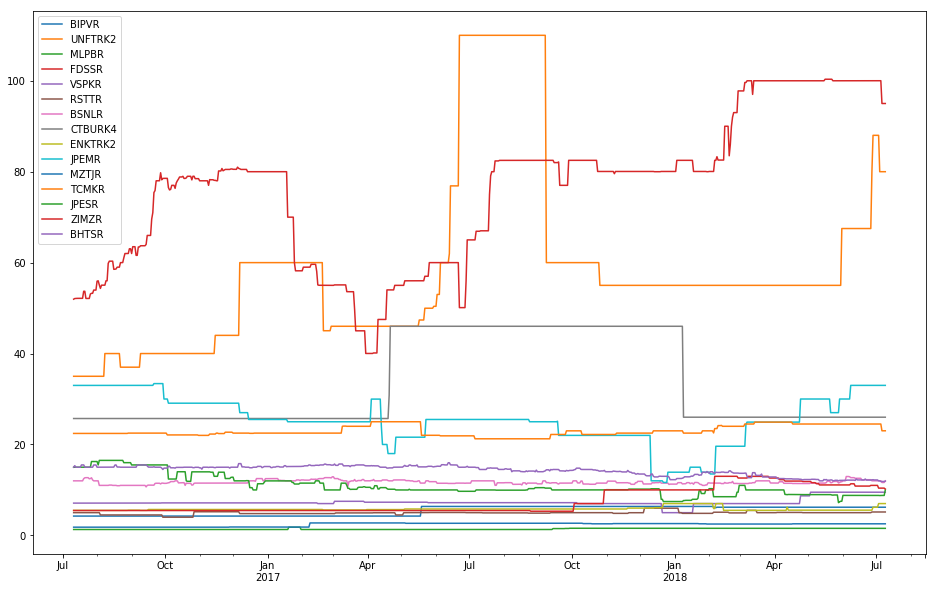

In [38]:
my_df.plot()

In [39]:
asset_number = len(my_df.columns.values)
print "Number ASSETS:", asset_number

Number ASSETS: 15


In [40]:
my_df.var()

BIPVR        1.040748
UNFTRK2    404.403661
MLPBR        0.017209
FDSSR      260.052093
VSPKR        0.714844
RSTTR        0.110567
BSNLR        0.178956
CTBURK4     93.957029
ENKTRK2      0.145828
JPEMR       26.893866
MZTJR        0.136218
TCMKR        1.303093
JPESR        4.976082
ZIMZR        7.692190
BHTSR        1.217655
dtype: float64

In [41]:
corrM = np.asmatrix(my_df.corr())
corrM

matrix([[ 1.        ,  0.54933576,  0.58590237,  0.5734833 ,  0.07887528,
          0.44290883, -0.23054383,  0.537176  ,  0.35783699, -0.41494584,
          0.64875013, -0.01780859, -0.70286942,  0.5930468 , -0.65617506],
        [ 0.54933576,  1.        , -0.01619326,  0.21507461,  0.11494518,
          0.16162052,  0.03064264,  0.49658434,  0.13653905, -0.10965978,
          0.42820757, -0.35663706, -0.42914656, -0.03541953, -0.15958253],
        [ 0.58590237, -0.01619326,  1.        ,  0.62007368,  0.13034403,
          0.35954972, -0.07958844,  0.00847619,  0.29682402, -0.36819685,
          0.28746332,  0.38851534, -0.53197528,  0.7860287 , -0.73415572],
        [ 0.5734833 ,  0.21507461,  0.62007368,  1.        ,  0.3189083 ,
          0.19826801, -0.16103919, -0.09925356,  0.09586858, -0.04447059,
          0.07147271,  0.2477192 , -0.40980655,  0.7320189 , -0.80874001],
        [ 0.07887528,  0.11494518,  0.13034403,  0.3189083 ,  1.        ,
         -0.09622968,  0.26458205,

In [42]:
cov = np.cov(my_df).round(2)
cov

array([[ 219.5 ,  219.84,  219.94, ...,  383.03,  383.03,  382.98],
       [ 219.84,  220.18,  220.27, ...,  383.51,  383.51,  383.46],
       [ 219.94,  220.27,  220.38, ...,  383.91,  383.91,  383.87],
       ..., 
       [ 383.03,  383.51,  383.91, ...,  790.1 ,  790.1 ,  788.8 ],
       [ 383.03,  383.51,  383.91, ...,  790.1 ,  790.1 ,  788.8 ],
       [ 382.98,  383.46,  383.87, ...,  788.8 ,  788.8 ,  787.61]])

In [43]:
my_df.std()

BIPVR       1.020171
UNFTRK2    20.109790
MLPBR       0.131182
FDSSR      16.126131
VSPKR       0.845484
RSTTR       0.332516
BSNLR       0.423032
CTBURK4     9.693143
ENKTRK2     0.381874
JPEMR       5.185930
MZTJR       0.369077
TCMKR       1.141531
JPESR       2.230713
ZIMZR       2.773480
BHTSR       1.103474
dtype: float64

### zeroM is used for testing without asset correlations

In [44]:
zeroM = numpy.zeros((asset_number, asset_number))
zeroM

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       

In [45]:
# normalize
ncov=((cov-cov.min())/(cov.max()-cov.min())).round(4)
#ncov=((cov-cov.mean())/cov.std()).round(4)
np.fill_diagonal(zeroM, (my_df.std()/100))
np.fill_diagonal(corrM, (my_df.std()/100))
#zeroM
corrM

matrix([[ 0.01020171,  0.54933576,  0.58590237,  0.5734833 ,  0.07887528,
          0.44290883, -0.23054383,  0.537176  ,  0.35783699, -0.41494584,
          0.64875013, -0.01780859, -0.70286942,  0.5930468 , -0.65617506],
        [ 0.54933576,  0.2010979 , -0.01619326,  0.21507461,  0.11494518,
          0.16162052,  0.03064264,  0.49658434,  0.13653905, -0.10965978,
          0.42820757, -0.35663706, -0.42914656, -0.03541953, -0.15958253],
        [ 0.58590237, -0.01619326,  0.00131182,  0.62007368,  0.13034403,
          0.35954972, -0.07958844,  0.00847619,  0.29682402, -0.36819685,
          0.28746332,  0.38851534, -0.53197528,  0.7860287 , -0.73415572],
        [ 0.5734833 ,  0.21507461,  0.62007368,  0.16126131,  0.3189083 ,
          0.19826801, -0.16103919, -0.09925356,  0.09586858, -0.04447059,
          0.07147271,  0.2477192 , -0.40980655,  0.7320189 , -0.80874001],
        [ 0.07887528,  0.11494518,  0.13034403,  0.3189083 ,  0.00845484,
         -0.09622968,  0.26458205,

In [46]:
my_df.cov().columns.values

array(['BIPVR', 'UNFTRK2', 'MLPBR', 'FDSSR', 'VSPKR', 'RSTTR', 'BSNLR',
       'CTBURK4', 'ENKTRK2', 'JPEMR', 'MZTJR', 'TCMKR', 'JPESR', 'ZIMZR',
       'BHTSR'], dtype=object)

In [47]:
ticker_11_returns = pd.read_csv("/home/xxx/BITELLIGENCE/BA-SASE/sase-11-returns.csv", sep=";")
ticker_11_returns["return"] = ticker_11_returns[["return"]].applymap(atof)
ticker_11_returns["return"] = ticker_11_returns["return"]/100
ticker_11_returns.head()

,name,ticker,return,cijena,datum
0,BIHACKA PIVOVARA D.D. BIHAC,BIPVR,0.009360,"6,20",11.07.2018
1,MLINPEK D.D. BUGOJNO,MLPBR,0.038053,"1,55",11.07.2018
2,FABRIKA DUHANA SARAJEVO DD SARAJEVO,FDSSR,0.054323,"95,00",11.07.2018
3,VISPAK DD VISOKO,VSPKR,0.072200,"9,50",11.07.2018
4,RUDNIK SOLI TUZLA DD TUZLA,RSTTR,0.014997,"5,15",11.07.2018


In [48]:
ticker_11_returns

,name,ticker,return,cijena,datum
0,BIHACKA PIVOVARA D.D. BIHAC,BIPVR,0.009360,"6,20",11.07.2018
1,MLINPEK D.D. BUGOJNO,MLPBR,0.038053,"1,55",11.07.2018
2,FABRIKA DUHANA SARAJEVO DD SARAJEVO,FDSSR,0.054323,"95,00",11.07.2018
3,VISPAK DD VISOKO,VSPKR,0.072200,"9,50",11.07.2018
4,RUDNIK SOLI TUZLA DD TUZLA,RSTTR,0.014997,"5,15",11.07.2018
5,BOSNALIJEK D.D. SARAJEVO,BSNLR,0.057270,"12,00",11.07.2018
6,CENTROTRANS-EUROLINES D.D. SARAJEVO,CTBURK4,0.050129,"26,00",11.07.2018
7,JP ELEKTROPRIVREDA HZHB MOSTAR,JPEMR,0.000278,"33,00",11.07.2018
8,JP ELEKTROPRIVREDA BIH DD SARAJEVO,JPESR,0.000208,"9,99",11.07.2018
9,ZIM DD ZENICA,ZIMZR,0.095504,"10,20",11.07.2018


In [49]:
ticker_11_returns.index = ticker_11_returns["ticker"]
ticker_11_returns.head()

,name,ticker,return,cijena,datum
ticker,,,,,
BIPVR,BIHACKA PIVOVARA D.D. BIHAC,BIPVR,0.009360,"6,20",11.07.2018
MLPBR,MLINPEK D.D. BUGOJNO,MLPBR,0.038053,"1,55",11.07.2018
FDSSR,FABRIKA DUHANA SARAJEVO DD SARAJEVO,FDSSR,0.054323,"95,00",11.07.2018
VSPKR,VISPAK DD VISOKO,VSPKR,0.072200,"9,50",11.07.2018
RSTTR,RUDNIK SOLI TUZLA DD TUZLA,RSTTR,0.014997,"5,15",11.07.2018


### calculate betas for every asset

In [50]:
## get market prices
sfpath = '/home/xxx/BITELLIGENCE/BA-SASE/sasx/SASX30-11072016-11072018.xls'
sasedf = pd.read_html(sfpath, thousands='None')[0]
sasedf.head()

,0,1,2,3
0,Datum,Aps. promjena,% promjena,Vrijednost
1,11.7.2018,"0,82","0,08 %","1.079,98"
2,10.7.2018,"0,18","0,02 %","1.079,16"
3,9.7.2018,"11,27","1,06 %","1.078,98"
4,6.7.2018,"-2,17","-0,20 %","1.067,71"


In [51]:
_df = sasedf
_df.columns = _df.iloc[0]
# drop not needed index
_df.drop(_df.index[0], inplace=True)
# drop not needed columns
_df.drop(_df.columns[1], axis=1, inplace=True)
_df.drop(_df.columns[1], axis=1, inplace=True)

#_df.drop(_df.index[0], inplace=True)
_df.head()

,Datum,Vrijednost
1,11.7.2018,"1.079,98"
2,10.7.2018,"1.079,16"
3,9.7.2018,"1.078,98"
4,6.7.2018,"1.067,71"
5,5.7.2018,"1.069,88"


In [52]:
## remove first two rows to match asset date range
_df.drop(_df.index[0], inplace=True)
_df.drop(_df.index[0], inplace=True)
#_df.drop(_df.columns[1], axis=1, inplace=True)
_df.head()

,Datum,Vrijednost
3,9.7.2018,"1.078,98"
4,6.7.2018,"1.067,71"
5,5.7.2018,"1.069,88"
6,4.7.2018,"1.066,66"
7,3.7.2018,"1.063,32"


In [53]:
# mace copy of date column
date_column_copy = pd.Series(_df.Datum)
date_column_copy.head()

3    9.7.2018
4    6.7.2018
5    5.7.2018
6    4.7.2018
7    3.7.2018
Name: Datum, dtype: object

In [54]:
_df.columns = ['Datum','SASX30']

In [55]:
# convert strings to floats
_df["SASX30"] = _df["SASX30"].str.replace(".","")
_df["SASX30"] = _df["SASX30"].str.replace(",",".").astype(float)
_df

,Datum,SASX30
3,9.7.2018,1078.98
4,6.7.2018,1067.71
5,5.7.2018,1069.88
6,4.7.2018,1066.66
7,3.7.2018,1063.32
8,2.7.2018,1061.26
9,29.6.2018,1061.26
10,28.6.2018,1061.40
11,27.6.2018,1058.11
12,26.6.2018,1056.97


In [56]:
_df["SASX30"] = pd.to_numeric(_df["SASX30"])
_df

,Datum,SASX30
3,9.7.2018,1078.98
4,6.7.2018,1067.71
5,5.7.2018,1069.88
6,4.7.2018,1066.66
7,3.7.2018,1063.32
8,2.7.2018,1061.26
9,29.6.2018,1061.26
10,28.6.2018,1061.40
11,27.6.2018,1058.11
12,26.6.2018,1056.97


In [57]:
_df.Datum = date_column_copy
_df.head()

,Datum,SASX30
3,9.7.2018,1078.98
4,6.7.2018,1067.71
5,5.7.2018,1069.88
6,4.7.2018,1066.66
7,3.7.2018,1063.32


In [58]:
#df = df.drop(columns=['Date', 'Symbol'])
_df = _df.set_index("Datum")
_df.index = pd.to_datetime(_df.index, format="%d.%m.%Y").normalize()

#df["time"] = df.index
_df.head()

,SASX30
Datum,
2018-07-09,1078.98
2018-07-06,1067.71
2018-07-05,1069.88
2018-07-04,1066.66
2018-07-03,1063.32


In [59]:
_df

,SASX30
Datum,
2018-07-09,1078.98
2018-07-06,1067.71
2018-07-05,1069.88
2018-07-04,1066.66
2018-07-03,1063.32
2018-07-02,1061.26
2018-06-29,1061.26
2018-06-28,1061.40
2018-06-27,1058.11


In [60]:

## do reindexing on SASX30 frame
start = min(min(_df.index),min(my_df.index))
end = max(max(_df.index),max(my_df.index))

dataframe = DataFrame(_df)
dataframe = dataframe.reindex(index = pd.date_range(start,end,freq='1d')).reset_index()
dataframe["SASX30"] = dataframe["SASX30"].fillna(method='ffill')
dataframe["SASX30"] = dataframe["SASX30"].fillna(method='bfill')
dataframe = dataframe.set_index("index")

#_df = do_reindexing(min(min(_df.index),min(my_df.index)),max(max(_df.index),max(my_df.index)),_df)
#print max(my_df.index)
#_df.tails()
#print min(dataframe.index)
#print min(my_df.index)

_df = DataFrame(dataframe)
_df.tail()

,SASX30
index,
2018-07-05,1069.88
2018-07-06,1067.71
2018-07-07,1067.71
2018-07-08,1067.71
2018-07-09,1078.98


In [61]:
_df.head()

,SASX30
index,
2016-07-11,931.45
2016-07-12,937.74
2016-07-13,935.30
2016-07-14,935.31
2016-07-15,926.62


## Market Risk (Deviation)

In [62]:
## SASX30 Risk
np.sqrt(_df["SASX30"].var())

33.711250989431306

## plot total market development over time

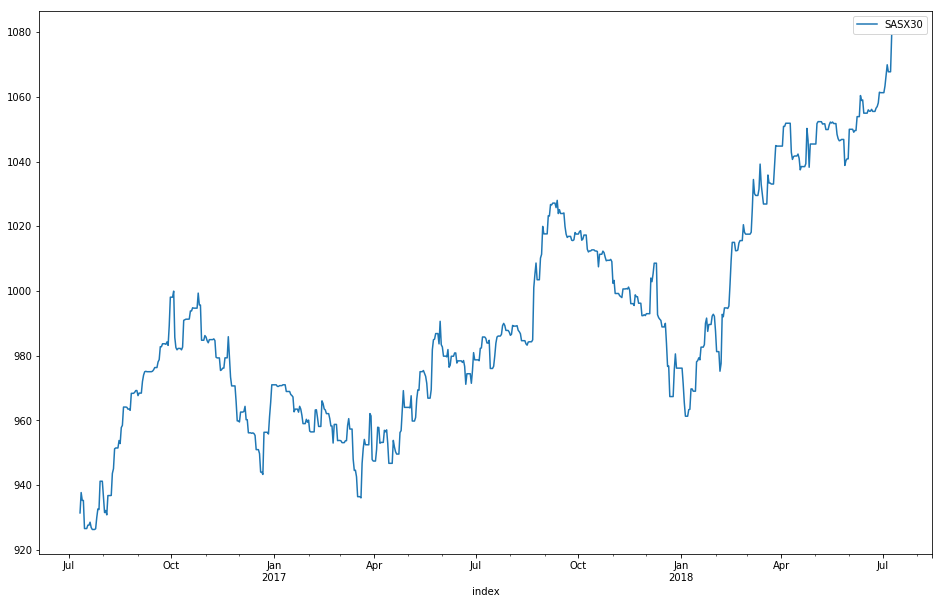

In [63]:
_df.plot()

## plot assets against the market (asset prices scaled)

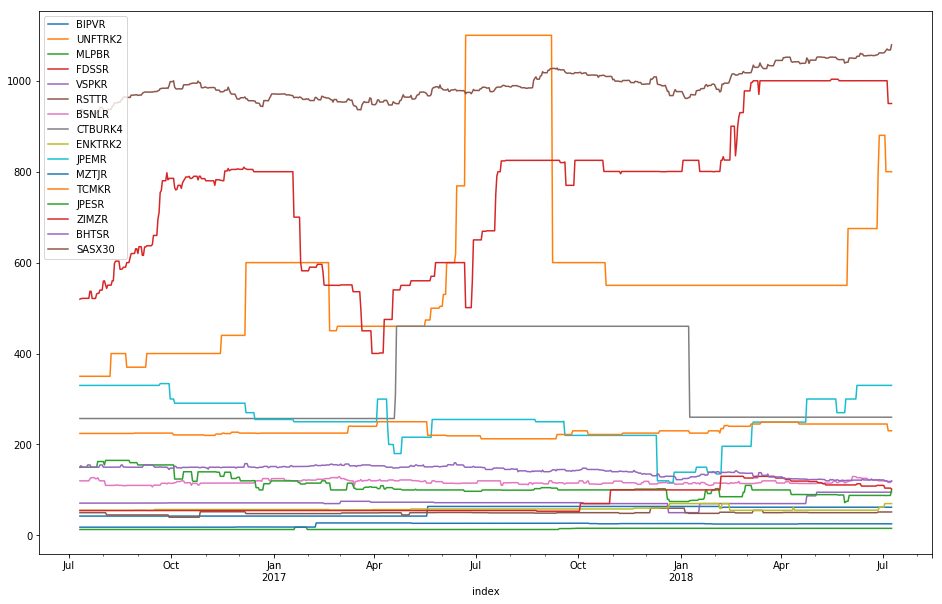

In [64]:
ax = (my_df*10).plot()
_df.plot(ax=ax)

In [65]:
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = sc.stats.linregress(x, y)
    return r_value**2

In [66]:
print len(my_df.TCMKR) 
print len(_df.SASX30)

729
729


In [67]:
## R² demo

In [68]:
rsquared(my_df.TCMKR.values,_df.SASX30.values)

0.13438126560922672

In [69]:
for ticker in my_df.columns.values:
    R_squared = rsquared(my_df[ticker], _df.SASX30)
    print ticker, "R_squared:", R_squared
    ticker_11_returns.at[ticker, 'R_squared'] = R_squared

BIPVR R_squared: 0.44001304285
UNFTRK2 R_squared: 0.0653137876123
MLPBR R_squared: 0.380699983532
FDSSR R_squared: 0.717579370631
VSPKR R_squared: 0.289906590851
RSTTR R_squared: 0.0288636896605
BSNLR R_squared: 0.0114430904216
CTBURK4 R_squared: 0.00093538775432
ENKTRK2 R_squared: 0.000174718180572
JPEMR R_squared: 0.00366832407503
MZTJR R_squared: 0.114415769854
TCMKR R_squared: 0.134381265609
JPESR R_squared: 0.233402202946
ZIMZR R_squared: 0.482661319473
BHTSR R_squared: 0.629070945627


In [70]:
ticker_11_returns

,name,ticker,return,cijena,datum,R_squared
ticker,,,,,,
BIPVR,BIHACKA PIVOVARA D.D. BIHAC,BIPVR,0.009360,"6,20",11.07.2018,0.440013
MLPBR,MLINPEK D.D. BUGOJNO,MLPBR,0.038053,"1,55",11.07.2018,0.380700
FDSSR,FABRIKA DUHANA SARAJEVO DD SARAJEVO,FDSSR,0.054323,"95,00",11.07.2018,0.717579
VSPKR,VISPAK DD VISOKO,VSPKR,0.072200,"9,50",11.07.2018,0.289907
RSTTR,RUDNIK SOLI TUZLA DD TUZLA,RSTTR,0.014997,"5,15",11.07.2018,0.028864
BSNLR,BOSNALIJEK D.D. SARAJEVO,BSNLR,0.057270,"12,00",11.07.2018,0.011443
CTBURK4,CENTROTRANS-EUROLINES D.D. SARAJEVO,CTBURK4,0.050129,"26,00",11.07.2018,0.000935
JPEMR,JP ELEKTROPRIVREDA HZHB MOSTAR,JPEMR,0.000278,"33,00",11.07.2018,0.003668
JPESR,JP ELEKTROPRIVREDA BIH DD SARAJEVO,JPESR,0.000208,"9,99",11.07.2018,0.233402


In [71]:
#rsquared(my_df.TCMKR,_df.SASX30)

## Visualize some R²

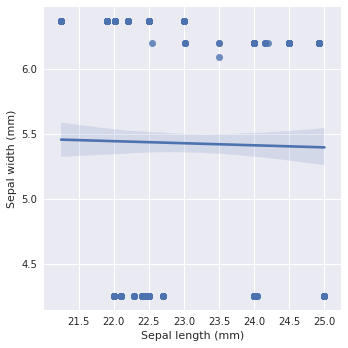

In [72]:
sns.set()
g = sns.lmplot(x="TCMKR", y="BIPVR",truncate=True, size=5, data=my_df)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")

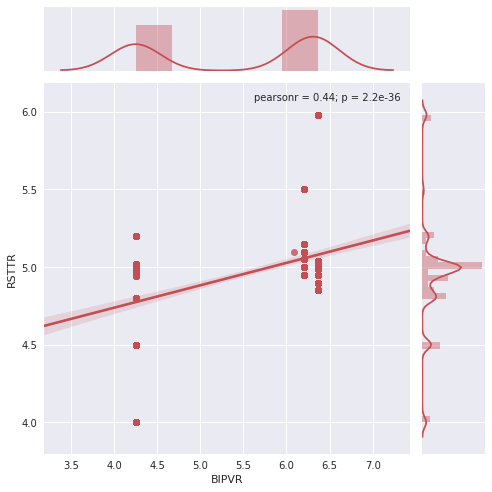

In [73]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

tips = sns.load_dataset("tips")
tips.head()
g = sns.jointplot("BIPVR", "RSTTR", data=my_df, kind="reg", color="r", size=7)

In [74]:
def get_ticker_R_squared(ticker):
    return round(ticker_11_returns.get_value(ticker,"R_squared"),6)

In [75]:
def get_ticker_return(ticker):
    return round(ticker_11_returns.get_value(ticker,"return"),6)

In [76]:
ticker_11_returns["return"].round(3)

ticker
BIPVR      0.009
MLPBR      0.038
FDSSR      0.054
VSPKR      0.072
RSTTR      0.015
BSNLR      0.057
CTBURK4    0.050
JPEMR      0.000
JPESR      0.000
ZIMZR      0.096
BHTSR      0.060
TCMKR      0.001
MZTJR      0.069
UNFTRK2    0.170
ENKTRK2    0.008
Name: return, dtype: float64

In [77]:
X = np.array([ticker_11_returns["return"].round(4)])
X.T

array([[ 0.0094],
       [ 0.0381],
       [ 0.0543],
       [ 0.0722],
       [ 0.015 ],
       [ 0.0573],
       [ 0.0501],
       [ 0.0003],
       [ 0.0002],
       [ 0.0955],
       [ 0.0598],
       [ 0.0011],
       [ 0.0688],
       [ 0.1698],
       [ 0.008 ]])

In [78]:
risk = np.array(corrM)
riskM = np.matrix(risk)
riskM.shape

(15, 15)

In [79]:
# inverted risk value matrice.
riskMinv = inv(riskM)
#riskMinvN = ((riskMinv-riskMinv.min())/(riskMinv.max()-riskMinv.min())).round(4)
riskMinv

matrix([[-0.83471501,  0.66196351,  0.05265185,  0.47154046,  0.05327607,
          0.03771972, -0.07010844,  0.03865563,  0.29060681,  0.00402971,
         -0.1257957 , -0.32140966, -0.13803932,  0.01738562, -0.23165103],
        [ 0.66196351, -0.79414197, -0.15162743,  0.07874651,  0.62515369,
          0.03260473, -0.54795315,  1.12182236, -0.79538921,  0.54439502,
          0.51612518, -0.31324373,  0.03359704, -0.22177702, -0.00871876],
        [ 0.05265185, -0.15162743, -1.13920394,  0.29769791, -0.10456621,
          0.21082341, -0.31650339, -0.23469603,  0.26550025, -0.10185866,
         -0.01599899,  0.23926553, -0.0744274 ,  0.30333571, -0.29357368],
        [ 0.47154046,  0.07874651,  0.29769791, -0.85170369,  0.37691188,
         -0.09747953, -1.02167825,  0.09987244, -0.11764348,  0.50596729,
         -0.05594415, -0.05981029,  0.26321904,  0.32325246, -0.41266667],
        [ 0.05327607,  0.62515369, -0.10456621,  0.37691188, -0.66488077,
         -0.17845111,  0.61804354,

In [80]:
ones = np.array([[1 for x in range(asset_number)]])
ones

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [81]:
w_gmv = 1/(ones * riskMinv * ones.T) * (ones * riskMinv)
w_gmv

matrix([[ 0.0082254 , -0.06846986,  0.09314212,  0.0174967 , -0.03020381,
          0.17842156,  0.01769307,  0.08291123,  0.15923267,  0.08744593,
         -0.03750069,  0.05104627,  0.23184385,  0.0581708 ,  0.15054476]])

In [82]:
def calculate_gmv(ones,riskMinv):
    return 1/(ones * riskMinv * ones.T) * (ones * riskMinv)

In [83]:
ones.shape,riskMinv.shape

((1, 15), (15, 15))

In [84]:
(X * w_gmv.T).item(0)

0.047700450696468645

In [85]:
# calculate return
def calculate_return(X, prtM):
    return X * prtM.T

In [86]:
X * w_gmv.T

matrix([[ 0.04770045]])

In [87]:
## variance of minimal risk portofolio
var_gmv = w_gmv * riskM * w_gmv.T
abs(var_gmv)

matrix([[ 0.08760702]])

In [88]:
## std. if minimal risk portofolio
std_gmv = np.sqrt(abs(var_gmv))
print std_gmv

[[ 0.29598483]]


In [89]:
# calculate risk(variance)
def calculate_risk(portfolioM, riskM):
    return abs(portfolioM * riskM * portfolioM.T)

In [90]:
# calculate deviation
def calculate_deviation(portfolioM, riskM):
    return np.sqrt(abs(portfolioM * riskM * portfolioM.T))

In [91]:
ticker_11_returns["min_risk_portofolio_perc"] = (np.array(w_gmv)[0,:])*100

In [92]:
ticker_11_returns["cijena"] = ticker_11_returns[["cijena"]].applymap(atof)

In [93]:
ticker_11_returns

,name,ticker,return,cijena,datum,R_squared,min_risk_portofolio_perc
ticker,,,,,,,
BIPVR,BIHACKA PIVOVARA D.D. BIHAC,BIPVR,0.009360,6.20,11.07.2018,0.440013,0.822540
MLPBR,MLINPEK D.D. BUGOJNO,MLPBR,0.038053,1.55,11.07.2018,0.380700,-6.846986
FDSSR,FABRIKA DUHANA SARAJEVO DD SARAJEVO,FDSSR,0.054323,95.00,11.07.2018,0.717579,9.314212
VSPKR,VISPAK DD VISOKO,VSPKR,0.072200,9.50,11.07.2018,0.289907,1.749670
RSTTR,RUDNIK SOLI TUZLA DD TUZLA,RSTTR,0.014997,5.15,11.07.2018,0.028864,-3.020381
BSNLR,BOSNALIJEK D.D. SARAJEVO,BSNLR,0.057270,12.00,11.07.2018,0.011443,17.842156
CTBURK4,CENTROTRANS-EUROLINES D.D. SARAJEVO,CTBURK4,0.050129,26.00,11.07.2018,0.000935,1.769307
JPEMR,JP ELEKTROPRIVREDA HZHB MOSTAR,JPEMR,0.000278,33.00,11.07.2018,0.003668,8.291123
JPESR,JP ELEKTROPRIVREDA BIH DD SARAJEVO,JPESR,0.000208,9.99,11.07.2018,0.233402,15.923267


In [94]:
ticker_11_returns["broj-dionica-za-600KM"] = (600/ticker_11_returns.cijena * ((ticker_11_returns.min_risk_portofolio_perc/100)))
ticker_11_returns["broj-dionica-za-600KM"] = ticker_11_returns["broj-dionica-za-600KM"].astype(int)

In [95]:
ticker_11_returns["broj-dionica-za-5000KM"] = (5000/ticker_11_returns.cijena * ((ticker_11_returns.min_risk_portofolio_perc/100)))
ticker_11_returns["broj-dionica-za-5000KM"] = ticker_11_returns["broj-dionica-za-5000KM"].astype(int)

In [96]:
ticker_11_returns["broj-dionica-za-1000KM"] = (1000/ticker_11_returns.cijena * ((ticker_11_returns.min_risk_portofolio_perc/100)))
ticker_11_returns["broj-dionica-za-1000KM"] = ticker_11_returns["broj-dionica-za-1000KM"].astype(int)

In [97]:
ticker_11_returns

,name,ticker,return,cijena,datum,R_squared,min_risk_portofolio_perc,broj-dionica-za-600KM,broj-dionica-za-5000KM,broj-dionica-za-1000KM
ticker,,,,,,,,,,
BIPVR,BIHACKA PIVOVARA D.D. BIHAC,BIPVR,0.009360,6.20,11.07.2018,0.440013,0.822540,0,6,1
MLPBR,MLINPEK D.D. BUGOJNO,MLPBR,0.038053,1.55,11.07.2018,0.380700,-6.846986,-26,-220,-44
FDSSR,FABRIKA DUHANA SARAJEVO DD SARAJEVO,FDSSR,0.054323,95.00,11.07.2018,0.717579,9.314212,0,4,0
VSPKR,VISPAK DD VISOKO,VSPKR,0.072200,9.50,11.07.2018,0.289907,1.749670,1,9,1
RSTTR,RUDNIK SOLI TUZLA DD TUZLA,RSTTR,0.014997,5.15,11.07.2018,0.028864,-3.020381,-3,-29,-5
BSNLR,BOSNALIJEK D.D. SARAJEVO,BSNLR,0.057270,12.00,11.07.2018,0.011443,17.842156,8,74,14
CTBURK4,CENTROTRANS-EUROLINES D.D. SARAJEVO,CTBURK4,0.050129,26.00,11.07.2018,0.000935,1.769307,0,3,0
JPEMR,JP ELEKTROPRIVREDA HZHB MOSTAR,JPEMR,0.000278,33.00,11.07.2018,0.003668,8.291123,1,12,2
JPESR,JP ELEKTROPRIVREDA BIH DD SARAJEVO,JPESR,0.000208,9.99,11.07.2018,0.233402,15.923267,9,79,15


## povrat za 10 godina na 5000KM je 4.5% sa rizikom od 2.4% (prakticno bez rizika)

In [98]:
# 9 percent return

In [99]:
ONE = np.array([[1 for x in range(asset_number)]])
A = (ONE * riskMinv * ONE.T).item(0)
B = (ONE * riskMinv * X.T).item(0)
C = (X * riskMinv * X.T).item(0)
M = np.matrix([[A,B],[B,C]])
determinantM = np.linalg.det(M)
#determinantM
def calculate_portofolio_allocation(ret):
    return (((C - ret * B)/determinantM) * riskMinv * ONE.T + ((ret * A - B)/determinantM) * riskMinv  * X.T).round(3)

calculate_portofolio_allocation(0.05755)


array([[-0.009],
       [-0.055],
       [ 0.08 ],
       [ 0.003],
       [-0.065],
       [ 0.207],
       [ 0.05 ],
       [ 0.079],
       [ 0.128],
       [ 0.093],
       [-0.015],
       [ 0.022],
       [ 0.232],
       [ 0.097],
       [ 0.153]])

In [100]:
newM = np.asmatrix(calculate_portofolio_allocation(0.05755).T)

In [101]:
np.sqrt(abs(newM * riskM * newM.T))

matrix([[ 0.30248637]])

In [102]:
calculate_risk(newM,riskM)

matrix([[ 0.091498]])

In [103]:
from itertools import combinations

l = my_df.columns.values

for var in combinations(l, 6):
    print var

('BIPVR', 'UNFTRK2', 'MLPBR', 'FDSSR', 'VSPKR', 'RSTTR')
('BIPVR', 'UNFTRK2', 'MLPBR', 'FDSSR', 'VSPKR', 'BSNLR')
('BIPVR', 'UNFTRK2', 'MLPBR', 'FDSSR', 'VSPKR', 'CTBURK4')
('BIPVR', 'UNFTRK2', 'MLPBR', 'FDSSR', 'VSPKR', 'ENKTRK2')
('BIPVR', 'UNFTRK2', 'MLPBR', 'FDSSR', 'VSPKR', 'JPEMR')
('BIPVR', 'UNFTRK2', 'MLPBR', 'FDSSR', 'VSPKR', 'MZTJR')
('BIPVR', 'UNFTRK2', 'MLPBR', 'FDSSR', 'VSPKR', 'TCMKR')
('BIPVR', 'UNFTRK2', 'MLPBR', 'FDSSR', 'VSPKR', 'JPESR')
('BIPVR', 'UNFTRK2', 'MLPBR', 'FDSSR', 'VSPKR', 'ZIMZR')
('BIPVR', 'UNFTRK2', 'MLPBR', 'FDSSR', 'VSPKR', 'BHTSR')
('BIPVR', 'UNFTRK2', 'MLPBR', 'FDSSR', 'RSTTR', 'BSNLR')
('BIPVR', 'UNFTRK2', 'MLPBR', 'FDSSR', 'RSTTR', 'CTBURK4')
('BIPVR', 'UNFTRK2', 'MLPBR', 'FDSSR', 'RSTTR', 'ENKTRK2')
('BIPVR', 'UNFTRK2', 'MLPBR', 'FDSSR', 'RSTTR', 'JPEMR')
('BIPVR', 'UNFTRK2', 'MLPBR', 'FDSSR', 'RSTTR', 'MZTJR')
('BIPVR', 'UNFTRK2', 'MLPBR', 'FDSSR', 'RSTTR', 'TCMKR')
('BIPVR', 'UNFTRK2', 'MLPBR', 'FDSSR', 'RSTTR', 'JPESR')
('BIPVR', 'UNFTRK2', 'M

('BIPVR', 'VSPKR', 'CTBURK4', 'ENKTRK2', 'JPEMR', 'MZTJR')
('BIPVR', 'VSPKR', 'CTBURK4', 'ENKTRK2', 'JPEMR', 'TCMKR')
('BIPVR', 'VSPKR', 'CTBURK4', 'ENKTRK2', 'JPEMR', 'JPESR')
('BIPVR', 'VSPKR', 'CTBURK4', 'ENKTRK2', 'JPEMR', 'ZIMZR')
('BIPVR', 'VSPKR', 'CTBURK4', 'ENKTRK2', 'JPEMR', 'BHTSR')
('BIPVR', 'VSPKR', 'CTBURK4', 'ENKTRK2', 'MZTJR', 'TCMKR')
('BIPVR', 'VSPKR', 'CTBURK4', 'ENKTRK2', 'MZTJR', 'JPESR')
('BIPVR', 'VSPKR', 'CTBURK4', 'ENKTRK2', 'MZTJR', 'ZIMZR')
('BIPVR', 'VSPKR', 'CTBURK4', 'ENKTRK2', 'MZTJR', 'BHTSR')
('BIPVR', 'VSPKR', 'CTBURK4', 'ENKTRK2', 'TCMKR', 'JPESR')
('BIPVR', 'VSPKR', 'CTBURK4', 'ENKTRK2', 'TCMKR', 'ZIMZR')
('BIPVR', 'VSPKR', 'CTBURK4', 'ENKTRK2', 'TCMKR', 'BHTSR')
('BIPVR', 'VSPKR', 'CTBURK4', 'ENKTRK2', 'JPESR', 'ZIMZR')
('BIPVR', 'VSPKR', 'CTBURK4', 'ENKTRK2', 'JPESR', 'BHTSR')
('BIPVR', 'VSPKR', 'CTBURK4', 'ENKTRK2', 'ZIMZR', 'BHTSR')
('BIPVR', 'VSPKR', 'CTBURK4', 'JPEMR', 'MZTJR', 'TCMKR')
('BIPVR', 'VSPKR', 'CTBURK4', 'JPEMR', 'MZTJR', 'JPESR')
(

('MLPBR', 'ENKTRK2', 'JPEMR', 'MZTJR', 'TCMKR', 'ZIMZR')
('MLPBR', 'ENKTRK2', 'JPEMR', 'MZTJR', 'TCMKR', 'BHTSR')
('MLPBR', 'ENKTRK2', 'JPEMR', 'MZTJR', 'JPESR', 'ZIMZR')
('MLPBR', 'ENKTRK2', 'JPEMR', 'MZTJR', 'JPESR', 'BHTSR')
('MLPBR', 'ENKTRK2', 'JPEMR', 'MZTJR', 'ZIMZR', 'BHTSR')
('MLPBR', 'ENKTRK2', 'JPEMR', 'TCMKR', 'JPESR', 'ZIMZR')
('MLPBR', 'ENKTRK2', 'JPEMR', 'TCMKR', 'JPESR', 'BHTSR')
('MLPBR', 'ENKTRK2', 'JPEMR', 'TCMKR', 'ZIMZR', 'BHTSR')
('MLPBR', 'ENKTRK2', 'JPEMR', 'JPESR', 'ZIMZR', 'BHTSR')
('MLPBR', 'ENKTRK2', 'MZTJR', 'TCMKR', 'JPESR', 'ZIMZR')
('MLPBR', 'ENKTRK2', 'MZTJR', 'TCMKR', 'JPESR', 'BHTSR')
('MLPBR', 'ENKTRK2', 'MZTJR', 'TCMKR', 'ZIMZR', 'BHTSR')
('MLPBR', 'ENKTRK2', 'MZTJR', 'JPESR', 'ZIMZR', 'BHTSR')
('MLPBR', 'ENKTRK2', 'TCMKR', 'JPESR', 'ZIMZR', 'BHTSR')
('MLPBR', 'JPEMR', 'MZTJR', 'TCMKR', 'JPESR', 'ZIMZR')
('MLPBR', 'JPEMR', 'MZTJR', 'TCMKR', 'JPESR', 'BHTSR')
('MLPBR', 'JPEMR', 'MZTJR', 'TCMKR', 'ZIMZR', 'BHTSR')
('MLPBR', 'JPEMR', 'MZTJR', 'JPESR', 

In [104]:
# build portfolio

In [105]:
prt_return575 = calculate_portofolio_allocation(0.05755)
prt_return8 = calculate_portofolio_allocation(0.08)
prt_return10 = calculate_portofolio_allocation(0.10)

In [106]:
july_portfolio = pd.DataFrame(ticker_11_returns[["name","ticker","datum","cijena","min_risk_portofolio_perc"]])
july_portfolio.head()

,name,ticker,datum,cijena,min_risk_portofolio_perc
ticker,,,,,
BIPVR,BIHACKA PIVOVARA D.D. BIHAC,BIPVR,11.07.2018,6.20,0.822540
MLPBR,MLINPEK D.D. BUGOJNO,MLPBR,11.07.2018,1.55,-6.846986
FDSSR,FABRIKA DUHANA SARAJEVO DD SARAJEVO,FDSSR,11.07.2018,95.00,9.314212
VSPKR,VISPAK DD VISOKO,VSPKR,11.07.2018,9.50,1.749670
RSTTR,RUDNIK SOLI TUZLA DD TUZLA,RSTTR,11.07.2018,5.15,-3.020381


In [107]:
july_portfolio["return575"] = prt_return575
july_portfolio["return8"] = prt_return8
july_portfolio["return10"] = prt_return10

In [108]:
july_portfolio.head()

,name,ticker,datum,cijena,min_risk_portofolio_perc,return575,return8,return10
ticker,,,,,,,,
BIPVR,BIHACKA PIVOVARA D.D. BIHAC,BIPVR,11.07.2018,6.20,0.822540,-0.009,-0.047,-0.082
MLPBR,MLINPEK D.D. BUGOJNO,MLPBR,11.07.2018,1.55,-6.846986,-0.055,-0.025,0.001
FDSSR,FABRIKA DUHANA SARAJEVO DD SARAJEVO,FDSSR,11.07.2018,95.00,9.314212,0.080,0.049,0.022
VSPKR,VISPAK DD VISOKO,VSPKR,11.07.2018,9.50,1.749670,0.003,-0.029,-0.057
RSTTR,RUDNIK SOLI TUZLA DD TUZLA,RSTTR,11.07.2018,5.15,-3.020381,-0.065,-0.146,-0.217


In [109]:
budget = 1000
asset_allocations = (budget/july_portfolio.cijena * ((july_portfolio.return575))).astype(int)
asset_allocations
#ticker_11_returns["broj-dionica-za-1000KM"] = ticker_11_returns["broj-dionica-za-1000KM"].astype(int)

ticker
BIPVR      -1
MLPBR     -35
FDSSR       0
VSPKR       0
RSTTR     -12
BSNLR      17
CTBURK4     1
JPEMR       2
JPESR      12
ZIMZR       9
BHTSR      -1
TCMKR       0
MZTJR      90
UNFTRK2     1
ENKTRK2    21
dtype: int64

In [110]:
#july_portfolio["575_return_allocation_1000"] = asset_allocations

In [111]:
july_portfolio

,name,ticker,datum,cijena,min_risk_portofolio_perc,return575,return8,return10
ticker,,,,,,,,
BIPVR,BIHACKA PIVOVARA D.D. BIHAC,BIPVR,11.07.2018,6.20,0.822540,-0.009,-0.047,-0.082
MLPBR,MLINPEK D.D. BUGOJNO,MLPBR,11.07.2018,1.55,-6.846986,-0.055,-0.025,0.001
FDSSR,FABRIKA DUHANA SARAJEVO DD SARAJEVO,FDSSR,11.07.2018,95.00,9.314212,0.080,0.049,0.022
VSPKR,VISPAK DD VISOKO,VSPKR,11.07.2018,9.50,1.749670,0.003,-0.029,-0.057
RSTTR,RUDNIK SOLI TUZLA DD TUZLA,RSTTR,11.07.2018,5.15,-3.020381,-0.065,-0.146,-0.217
BSNLR,BOSNALIJEK D.D. SARAJEVO,BSNLR,11.07.2018,12.00,17.842156,0.207,0.273,0.332
CTBURK4,CENTROTRANS-EUROLINES D.D. SARAJEVO,CTBURK4,11.07.2018,26.00,1.769307,0.050,0.124,0.191
JPEMR,JP ELEKTROPRIVREDA HZHB MOSTAR,JPEMR,11.07.2018,33.00,8.291123,0.079,0.071,0.064
JPESR,JP ELEKTROPRIVREDA BIH DD SARAJEVO,JPESR,11.07.2018,9.99,15.923267,0.128,0.056,-0.008


In [112]:
#july_portfolio = july_portfolio.drop(columns=['575_risk_allocation_1000'])

In [113]:
from datetime import datetime
import datetime
# write to file
datetime_string = datetime.datetime.now().strftime('%Y-%m-%d')
filename = '/home/xxx/BITELLIGENCE/BA-SASE/portfolio-1000KM-' + datetime_string +".csv"
print "writing to file: " + filename
july_portfolio.to_csv(filename, encoding='utf-8', index=False, sep=';')

writing to file: /home/xxx/BITELLIGENCE/BA-SASE/portfolio-1000KM-2018-07-12.csv


In [114]:
import quandl
mydata = quandl.get("FRED/GDP")

In [115]:
mydata.head()

,Value
Date,
1947-01-01,243.080
1947-04-01,246.267
1947-07-01,250.115
1947-10-01,260.309
1948-01-01,266.173


In [116]:
import random
print(random.randint(0,9))

5


In [117]:
int(random.uniform(0,1))

0

# generate all posible portfolio combinations 

In [151]:
prt_allocation_strategies = np.random.dirichlet(np.ones(asset_number),size=4000000)
print np.matrix(prt_allocation_strategies[0])

[[ 0.13223269  0.12037208  0.00140782  0.10689074  0.26944713  0.07661281
   0.026305    0.08461003  0.04392823  0.01245072  0.05660621  0.00592639
   0.02658818  0.00302735  0.03359462]]


In [152]:
calculate_return(X, np.asmatrix(prt_allocation_strategies[0]))

matrix([[ 0.03059947]])

In [153]:
calculate_deviation(np.asmatrix(prt_allocation_strategies[0]),riskM)

matrix([[ 0.07952538]])

In [154]:
risk_dict = {}
x_risk = []
y_return = []
label = []
for prt_allocation in prt_allocation_strategies:
    pallocation = np.asmatrix(prt_allocation)
    prisk = round((calculate_deviation(pallocation,riskM).item(0)),4)
    preturn = round(calculate_return(X, pallocation).item(0),4)
    
    if not (prisk in risk_dict and preturn < risk_dict[prisk]):
        risk_dict[prisk] = preturn
    
    
    x_risk.append(prisk)
    y_return.append(preturn)
    label.append(pallocation)

In [155]:
len(risk_dict)

2234

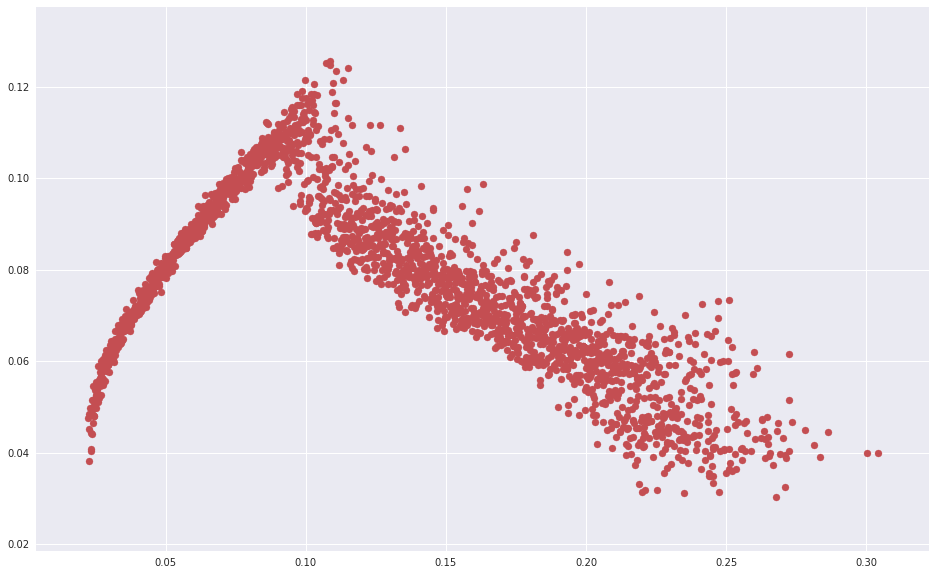

In [156]:
plt.scatter(risk_dict.keys(), risk_dict.values(), c="r")
#list(risk_dict.keys())
#list(risk_dict.values())

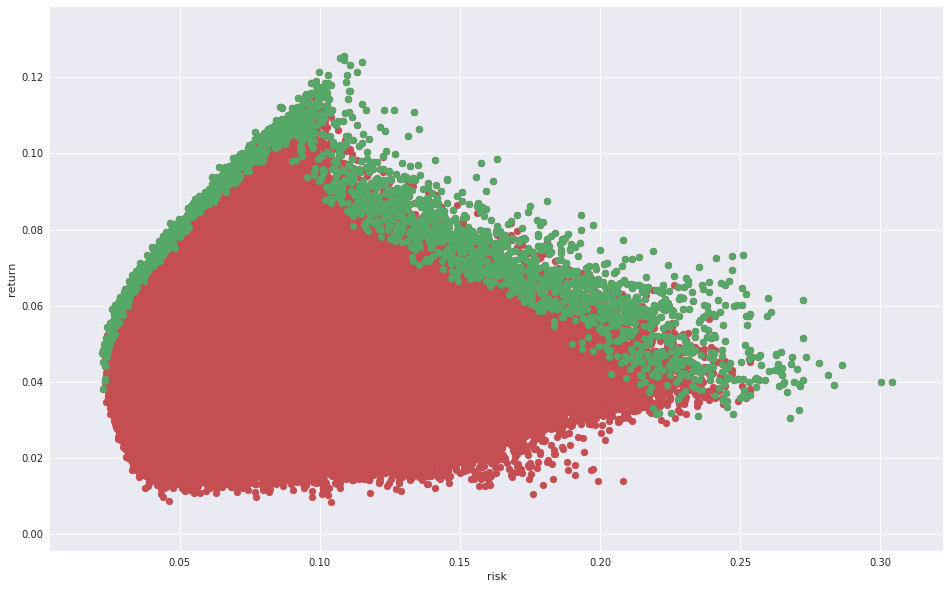

In [157]:
plt.scatter(x_risk,y_return , c="r")
#plt.scatter(risk_dict)
plt.scatter(risk_dict.keys(), risk_dict.values(), c="g")
plt.xlabel("risk")
plt.ylabel("return")
plt.show()

In [158]:
get_ticker_return("TCMKR")

/home/xxx/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


0.001078

## find all possible asset combinations for min risk and max return

In [159]:
import itertools

# save for plotting
comb_risk = []
comb_return = []
comb_label = []

# ticker symbols
stuff = my_df.columns.values
# all possible combinations
for L in range(3, len(stuff)+1):
    for subset in itertools.combinations(stuff, L):
        
        # generate returns list
        subset_returns = []
        # generate beta list
        subset_beta = []
        for ast in subset:    
            #print ast
            subset_returns.append(get_ticker_return(ast))
            subset_beta.append(get_ticker_R_squared(ast))
        
        #print(subset)
        
        subset_risks = my_df.std()[list(subset)].values
        #print subset_returns
        asset_number = len(subset)
        zeroM = numpy.zeros((asset_number, asset_number))
        np.fill_diagonal(zeroM, (my_df.std()/100).round(4))
        risk = np.array(zeroM)
        riskM = np.matrix(risk)
        riskMinv = inv(riskM)
        ones = np.array([[1 for x in range(asset_number)]])
        
        
        gmv = calculate_gmv(ones, riskMinv)
        pallocation = np.asmatrix(gmv)
        prisk = round(calculate_risk(gmv,riskM).item(0),4)
        pdeviate = round(calculate_deviation(gmv,riskM).item(0),4)
        preturn = round(calculate_return(subset_returns, gmv).item(0),4)
        pbeta = round(sum(subset_beta),5)
        
        rank = abs(preturn - prisk)

        if  pdeviate < 0.05 and preturn > 0.08 and pbeta < 0.69:
            print "---"
            print len(subset), pdeviate, preturn, pbeta, subset
            print gmv
            print "---"
            comb_risk.append(pdeviate)
            comb_return.append(preturn)
            comb_label.append(subset)


/home/xxx/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


---
3 0.0339 0.0802 0.46964 ('UNFTRK2', 'VSPKR', 'MZTJR')
[[ 0.11239902  0.00570099  0.88189999]]
---
---
3 0.0339 0.1034 0.57684 ('UNFTRK2', 'RSTTR', 'ZIMZR')
[[ 0.11239902  0.00570099  0.88189999]]
---
---
3 0.0339 0.0801 0.19117 ('UNFTRK2', 'BSNLR', 'MZTJR')
[[ 0.11239902  0.00570099  0.88189999]]
---
---
3 0.0339 0.1036 0.55942 ('UNFTRK2', 'BSNLR', 'ZIMZR')
[[ 0.11239902  0.00570099  0.88189999]]
---
---
3 0.0339 0.0801 0.18067 ('UNFTRK2', 'CTBURK4', 'MZTJR')
[[ 0.11239902  0.00570099  0.88189999]]
---
---
3 0.0339 0.1036 0.54891 ('UNFTRK2', 'CTBURK4', 'ZIMZR')
[[ 0.11239902  0.00570099  0.88189999]]
---
---
3 0.0339 0.1034 0.54815 ('UNFTRK2', 'ENKTRK2', 'ZIMZR')
[[ 0.11239902  0.00570099  0.88189999]]
---
---
3 0.0339 0.1033 0.55164 ('UNFTRK2', 'JPEMR', 'ZIMZR')
[[ 0.11239902  0.00570099  0.88189999]]
---
---
3 0.0339 0.1037 0.66239 ('UNFTRK2', 'MZTJR', 'ZIMZR')
[[ 0.11239902  0.00570099  0.88189999]]
---
---
3 0.0339 0.1033 0.68236 ('UNFTRK2', 'TCMKR', 'ZIMZR')
[[ 0.11239902  0.0

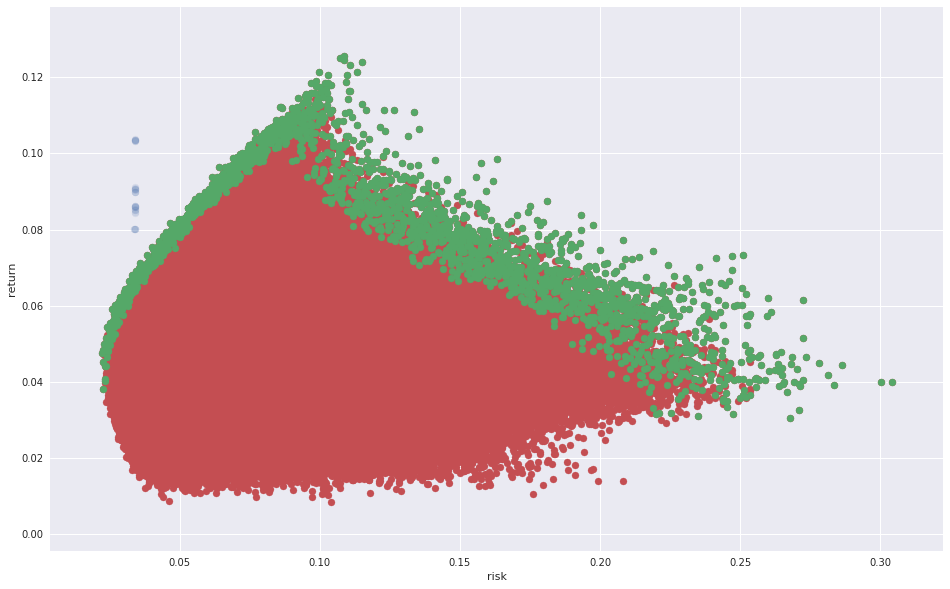

In [160]:
plt.scatter(x_risk,y_return , c="r")
#plt.scatter(risk_dict)
plt.scatter(risk_dict.keys(), risk_dict.values(), c="g")
plt.scatter(comb_risk,comb_return,c="b", label=comb_label, alpha=0.1)
plt.xlabel("risk")
plt.ylabel("return")
plt.show()